# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [14]:
#import libraries
import numpy as np
import pandas as pd
%matplotlib inline

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [15]:
# Your code here
data = pd.read_csv('../data/boston_data.csv')
prices = data['medv']
features = data.drop('medv', axis = 1)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [16]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940,-0.400956
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075,0.355608
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
chas,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061,0.141400
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025,0.683541
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001,-0.390863
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912,0.264876
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279,-0.423508
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792


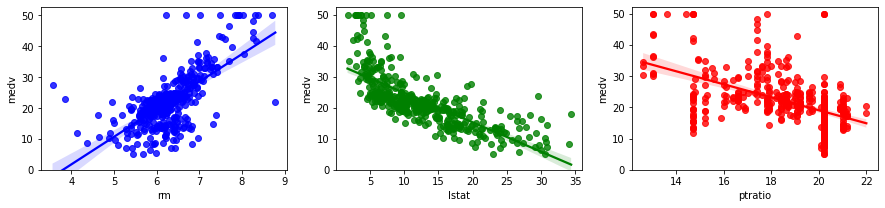

In [17]:
#From the above chart there are 3 variables which have a greater coorelation: rm ,lstat and ptratio
# Your plots here
import matplotlib.pyplot as plt
import seaborn as sns
clr = ['blue', 'green', 'red']
fig, axs = plt.subplots(ncols=3,figsize=(15,3))

for i, var in enumerate(['rm', 'lstat', 'ptratio']):
    lm = sns.regplot(data[var], prices, ax = axs[i], color=clr[i])
    lm.set(ylim=(0, None))

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [18]:
# Your response here According to scatterplots, there is a good correlation between house prices and RM, LSTAT. There is no strongly marked correlation between prices and PTRATIO. 

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

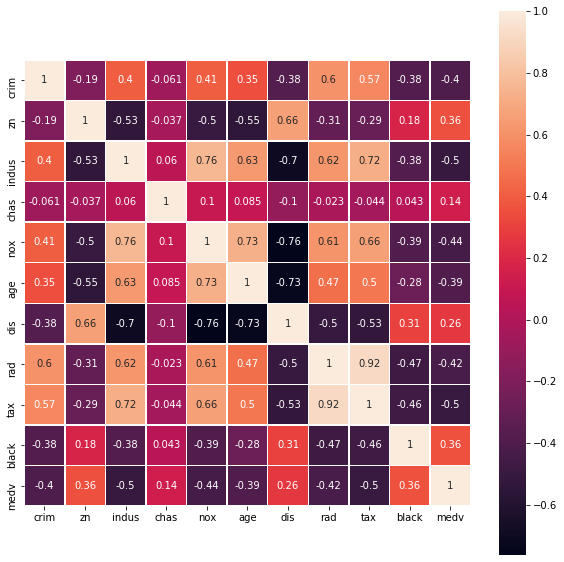

In [19]:
# Your response here
data_filter = data[data.columns[~data.columns.isin(['rm','lstat', 'ptratio'])]]
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(data_filter.corr(), square=True,annot=True,linewidths=.5)
#No others are also do not have high correlations

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [20]:
# Your code here
prices.describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [21]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [37]:
# Your code here
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
data_train_X = data[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black']]
data_train_y = data['medv']
X_train,X_test,y_train,y_test = train_test_split(data_train_X,data_train_y,test_size = .20)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [48]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor as RFR
# Five separate RFR here with the given max depths
scores_train = []
scores_test = []
max_depth = [2,4,6,8,10]
for depth in max_depth:
 clf = RFR(max_depth= depth, random_state=1)
 clf.fit(X_train,y_train) 
 y_pred_train = clf.predict(X_train)
 y_pred_test = clf.predict(X_test)
    
 score_train = performance_metric(y_train,y_pred_train)
 scores_train.append(score_train)
    
 score_test = performance_metric(y_test,y_pred_test)
 scores_test.append(score_test)

Now, plot the score for each tree on the training set and on the testing set.

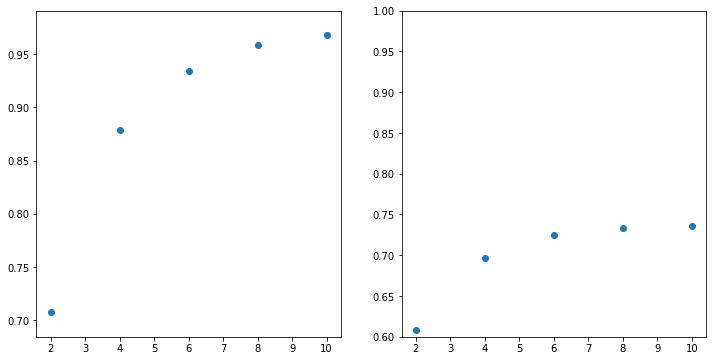

In [49]:
# Produce a plot with the score for the testing and training for the different max depths

fig, ax = plt.subplots(ncols=2,figsize=(12,6))
plt.ylim(0.6,1.0)
ax[0].scatter(max_depth,scores_train)
ax[1].scatter(max_depth,scores_test)

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# The deeper the max_depth is better is the result

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here: A max depth of 1 would suffer from high bias and when modeled with 10 it will have a higher variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [50]:
scores_train = []
scores_test = []
max_depth =[1, 5, 10, 15, 20, 50,100]
for depth in max_depth:
 clf = RFR(max_depth= depth, random_state=1)
 clf.fit(X_train,y_train) 
 y_pred_train = clf.predict(X_train)
 y_pred_test = clf.predict(X_test)
    
 score_train = performance_metric(y_train,y_pred_train)
 scores_train.append(score_train)
    
 score_test = performance_metric(y_test,y_pred_test)
 scores_test.append(score_test)

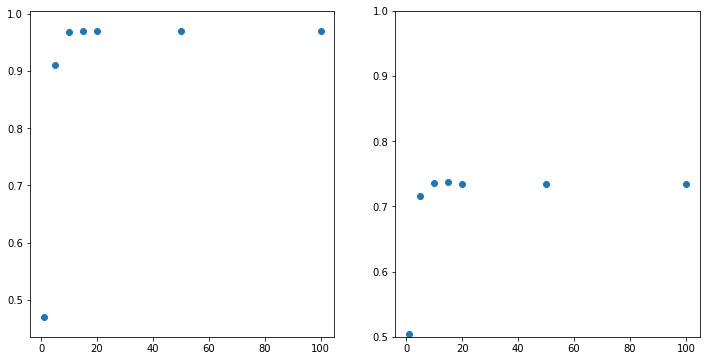

In [51]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))
plt.ylim(0.5,1.0)
ax[0].scatter(max_depth,scores_train)
ax[1].scatter(max_depth,scores_test)

In [ ]:
# Your response here:
"""
The graph gives us the intution about the High Variance and High Bias , which leads to underfitting and overfitting of the modes build from the algorithms. with increase in depth , we can see that the model scores are deviating . When the

Depth is 1 the model suffers from #High Bias .Things are over simplified and we are not exploiting all the features capability.
With Training from maximum depth i..e 10, the Model will not get generalised we see that scores are very less for test data and high variance
Depth with 3 seems to ne an ideal as it low variance and low bias
"""

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
"""
1.Relevance depency of the factor. Since inflation decides the cost only it's unrelated with other features
2.The features are sufficient enought for the model . SQ feet is almost the duplicacy of the No of rooms , appliances are more or less personal preference. Other external factors like Social economic crimes,office commuting distance
3.Model can be improved with few more parameters ,if we are able to fine fee more.
4.No ,data for rural may not apply
"""